# Module 2 Week 1 Exercise

In [307]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [308]:
#1 
def compute_vector_length(vector):
    return np.linalg.norm(vector)

#2
def compute_dot_product(vector1, vector2):
    return np.dot(vector1, vector2)

#3
def matrix_multi_vector(matrix, vector):
    return np.dot(matrix, vector)

#4
def matrix_multi_matrix(matrix1, matrix2):
    return np.dot(matrix1, matrix2)



In [309]:
def compute_cosine(v1, v2):
    return np.dot(v1, v2) / (np.norm(v1) * np.norm(v2))

### Background subtraction

In [310]:
SIZE = (626, 417)
THRESHOLD = 37

In [311]:


ob_img = cv2.imread("/home/khoa2802/A-PRACTICE PROJECT/AIO/cat2.png", 1)
ob_img = cv2.cvtColor(ob_img, cv2.COLOR_RGB2BGR)
print(ob_img.shape)

bg1_img = cv2.imread("/home/khoa2802/A-PRACTICE PROJECT/AIO/bg1.png", 1)
bg1_img = cv2.resize(bg1_img, SIZE)
print(bg1_img.shape)

bg2_img = cv2.imread("/home/khoa2802/A-PRACTICE PROJECT/AIO/bg2.png", 1)
bg2_img = cv2.resize(bg2_img, SIZE)
print(bg2_img.shape)

(417, 626, 3)
(417, 626, 3)
(417, 626, 3)


In [312]:
def compute_difference(bg_img, input_img):
    return np.abs(bg_img - input_img).mean(axis=2)

diff_single_channel = compute_difference(bg1_img, ob_img)

[]

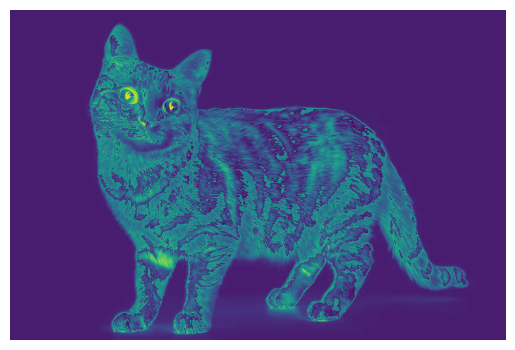

In [313]:
plt.axis('off')
plt.imshow(diff_single_channel)
plt.plot()

In [314]:
def compute_binary_mask(diff):
    diff = np.where(diff >= THRESHOLD, 255, 0)
    diff = np.stack((diff,), axis=-1)
    return diff

binary_mask = compute_binary_mask(diff_single_channel)

[]

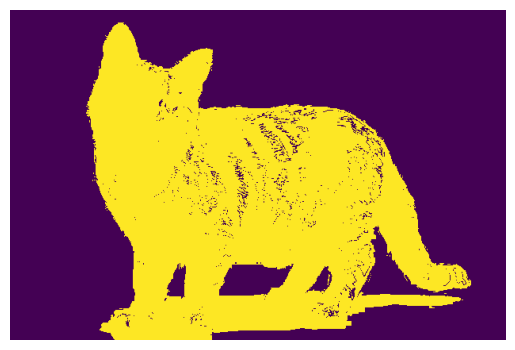

In [315]:
plt.axis('off')
plt.imshow(binary_mask)
plt.plot()

In [316]:
def replace_background(bg1_img, bg2_img, ob_img):
    diff_single_channel = compute_difference(bg1_img, ob_img)
    binary_mask = compute_binary_mask(diff_single_channel)

    output = np.where(binary_mask==255, ob_img, bg2_img)

    return output

[]

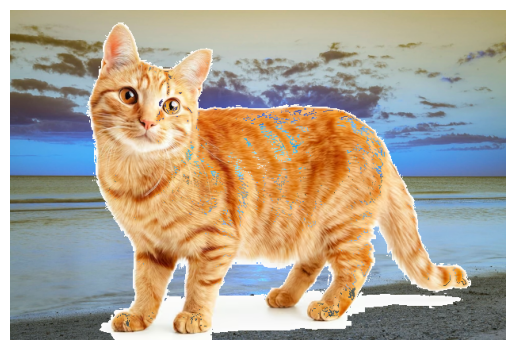

In [317]:
plt.axis('off')
plt.imshow(replace_background(bg1_img, bg2_img, ob_img))
plt.plot()